# Wyscout Data for Inter 2017-18

In this notebooks we will learn to work with [Wyscout](https://wyscout.com/) data and to extract useful information for the tactical point of view.

For this course we will use che [Player Rank](https://github.com/mesosbrodleto/playerank) open source project owned by Pappalardo Luca, Cintia Paolo & Co.

## utilities

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import util
path = "C:/Users/Mauro/OneDrive/Documenti/Football/Inter_2017_2018"
inter_id = 3161

**COUNT TOTAL PASSES FOR EACH PLAYER IN EACH MATCH**

In [2]:
inter_matches_events = pd.read_csv(os.path.join(path, "inter_matches_events.csv"))
#filter by pass event (eventId == 8) and team associated to the event (teamId == 3161, which is inter_id)
#get column referred to match (matchId) and player (playerId)
total_passes = inter_matches_events.query("eventId == 8 and teamId == 3161")[['matchId', 'playerId']]
total_passes.head(3)

,matchId,playerId
5,2575963,20517
15,2575963,116349
16,2575963,20556


In [3]:
#group the passes by playerId and matchId to obtain the count of passes for each player in each match
total_passes = pd.DataFrame(total_passes.groupby(['playerId', 'matchId']).size()).reset_index()
total_passes.columns = ["playerId", "matchId", "#passes"]
total_passes.head(3)

,playerId,matchId,#passes
0,3344,2576174,1
1,3344,2576180,27
2,3344,2576191,26


In [4]:
#merge the count of passes with players data to obtain the players' name and the players' role
inter_players = pd.read_csv(os.path.join(path, "inter_players.csv"))
total_passes = pd.merge(total_passes, inter_players, how="left", left_on="playerId", right_on="wyId")[["playerId", "role_name", "shortName", "matchId", "#passes"]]
total_passes.head(3)

,playerId,role_name,shortName,matchId,#passes
0,3344,Midfielder,Rafinha,2576174,1
1,3344,Midfielder,Rafinha,2576180,27
2,3344,Midfielder,Rafinha,2576191,26


In [5]:
#merge the count of passes with matches data to obtain the matches' gameweek and the matches' label
inter_matches = pd.read_csv(os.path.join(path, "inter_matches.csv"))
total_passes = pd.merge(total_passes, inter_matches, how="left", left_on="matchId", right_on="wyId")[["playerId", "role_name", "shortName", "matchId", "gameweek", "label", "#passes"]]
total_passes.head(3)

,playerId,role_name,shortName,matchId,gameweek,label,#passes
0,3344,Midfielder,Rafinha,2576174,22,"SPAL - Internazionale, 1 - 1",1
1,3344,Midfielder,Rafinha,2576180,23,"Internazionale - Crotone, 1 - 1",27
2,3344,Midfielder,Rafinha,2576191,24,"Internazionale - Bologna, 2 - 1",26


**FOCUS ON BROZOVIC PASS PERFORMANCE**

In [6]:
brozovic = inter_players[inter_players.shortName.str.contains("Brozo")]
brozovic

,wyId,role_name,shortName
21,69968,Midfielder,M. Brozović


In [7]:
match_id = inter_matches[inter_matches.label.str.contains(" - Napoli")].wyId.iloc[0]
total_passes.query("playerId == " + str(brozovic.wyId.iloc[0]) + " and matchId == " + str(match_id))

,playerId,role_name,shortName,matchId,gameweek,label,#passes
311,69968,Midfielder,M. Brozović,2576234,28,"Internazionale - Napoli, 0 - 0",57


**BROZOVIC NUMBER OF PASS EVOLUTION DURING THE SEASON (COMPARED WITH BORJA VALERO)**

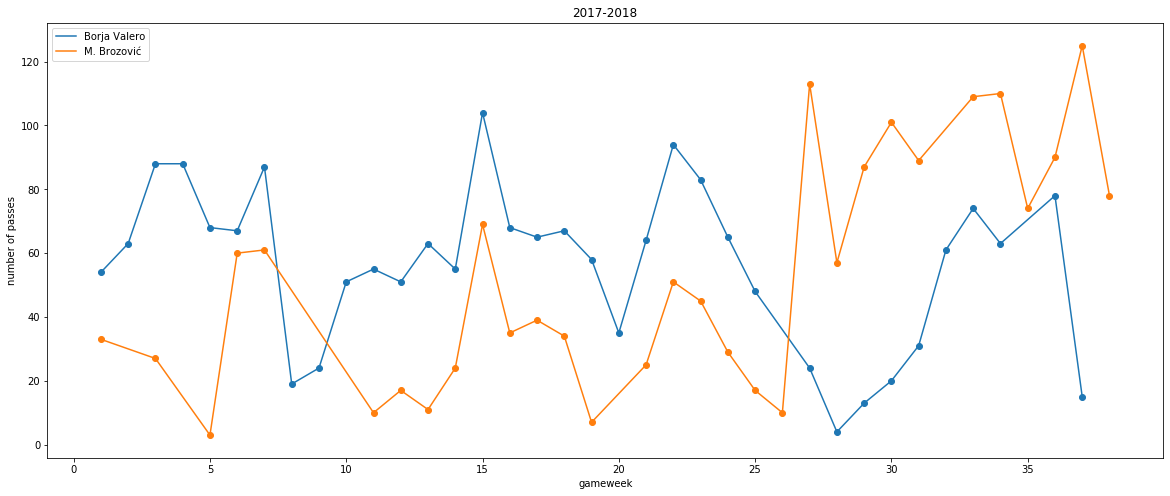

In [8]:
plt.figure(figsize=(20, 8))
players_to_compare = ["M. Brozović", "Borja Valero"]
group = total_passes.query("shortName in " + str(players_to_compare))
for p in group.shortName.unique():
    df = group[group.shortName == p].sort_values(by="gameweek", ascending=True)
    df = df.reset_index(drop=True)
    plt.plot(df.gameweek, df["#passes"])
    plt.scatter(df.gameweek, df["#passes"])
plt.title("2017-2018")
plt.xlabel("gameweek")
plt.ylabel("number of passes")
plt.legend(group.shortName.unique())
plt.show()

**CALCULATE PASS ACCURACY FOR EACH PLAYER IN EACH MATCH**

In [9]:
##filter by pass event (eventId == 8) and team associated to the event (teamId == 3161, which is inter_id)
positive_passes = inter_matches_events.query("eventId == 8 and teamId == 3161")
#assign a label positive="yes" for each accurate pass (which has 1801 in tags)
#get columns referred to match (matchId), player (playerId) and label of the pass' outcome
positive_passes = util.label_positive_passes(positive_passes, "tags")[['matchId', 'playerId', 'positive']]
positive_passes.head(3)

,matchId,playerId,positive
0,2575963,20517,yes
1,2575963,116349,yes
2,2575963,20556,yes


In [10]:
#filter to keep only accurated pass
positive_passes = positive_passes.query("positive == 'yes'")
#group accurated pass by match and player to obtain the count of accurated pass for each player in each match
positive_passes = pd.DataFrame(positive_passes.groupby(['playerId', 'matchId', 'positive']).size()).reset_index()
positive_passes.drop("positive", axis=1, inplace=True)
positive_passes.columns = ["playerId", "matchId", "#positive_passes"]
positive_passes.head(3)

,playerId,matchId,#positive_passes
0,3344,2576174,1
1,3344,2576180,26
2,3344,2576191,23


In [11]:
#merge with players' data to obtain players' name and players' role
positive_passes = pd.merge(positive_passes, inter_players, how="left", left_on="playerId", right_on="wyId")[["playerId", "role_name", "shortName", "matchId", "#positive_passes"]]
positive_passes.head(3)

,playerId,role_name,shortName,matchId,#positive_passes
0,3344,Midfielder,Rafinha,2576174,1
1,3344,Midfielder,Rafinha,2576180,26
2,3344,Midfielder,Rafinha,2576191,23


In [12]:
#merge with matches' data to obtain matches' gameweek and matches' label
positive_passes = pd.merge(positive_passes, inter_matches, how="left", left_on="matchId", right_on="wyId")[["playerId", "role_name", "shortName", "matchId", "gameweek", "label", "#positive_passes"]]
positive_passes.head(3)

,playerId,role_name,shortName,matchId,gameweek,label,#positive_passes
0,3344,Midfielder,Rafinha,2576174,22,"SPAL - Internazionale, 1 - 1",1
1,3344,Midfielder,Rafinha,2576180,23,"Internazionale - Crotone, 1 - 1",26
2,3344,Midfielder,Rafinha,2576191,24,"Internazionale - Bologna, 2 - 1",23


In [13]:
#merge with count of total passes data 
positive_passes = pd.merge(total_passes, positive_passes, how="left", left_on=["matchId", "playerId"], right_on=["matchId", "playerId"])[["playerId", "role_name_x", "shortName_x", "matchId", "gameweek_x", "label_x", "#positive_passes", "#passes"]]
positive_passes.head(3)

,playerId,role_name_x,shortName_x,matchId,gameweek_x,label_x,#positive_passes,#passes
0,3344,Midfielder,Rafinha,2576174,22,"SPAL - Internazionale, 1 - 1",1.0,1
1,3344,Midfielder,Rafinha,2576180,23,"Internazionale - Crotone, 1 - 1",26.0,27
2,3344,Midfielder,Rafinha,2576191,24,"Internazionale - Bologna, 2 - 1",23.0,26


In [14]:
#calculate pass accuracy dividing count of accurated passes by count of total passes
positive_passes['pass_accuracy'] = round((positive_passes["#positive_passes"] / positive_passes["#passes"]) * 100, 2)
positive_passes.head(3)

,playerId,role_name_x,shortName_x,matchId,gameweek_x,label_x,#positive_passes,#passes,pass_accuracy
0,3344,Midfielder,Rafinha,2576174,22,"SPAL - Internazionale, 1 - 1",1.0,1,100.00
1,3344,Midfielder,Rafinha,2576180,23,"Internazionale - Crotone, 1 - 1",26.0,27,96.30
2,3344,Midfielder,Rafinha,2576191,24,"Internazionale - Bologna, 2 - 1",23.0,26,88.46


**FOCUS ON BROZOVIC PASS PERFORMANCE**

In [15]:
match_id = inter_matches[inter_matches.label.str.contains(" - Napoli")].wyId.iloc[0]
positive_passes.query("playerId == " + str(brozovic.wyId.iloc[0]) + " and matchId == " + str(match_id))

,playerId,role_name_x,shortName_x,matchId,gameweek_x,label_x,#positive_passes,#passes,pass_accuracy
311,69968,Midfielder,M. Brozović,2576234,28,"Internazionale - Napoli, 0 - 0",50.0,57,87.72


**BROZOVIC PASS ACCURACY EVOLUTION DURING THE SEASON (COMPARED WITH BORJA VALERO)**

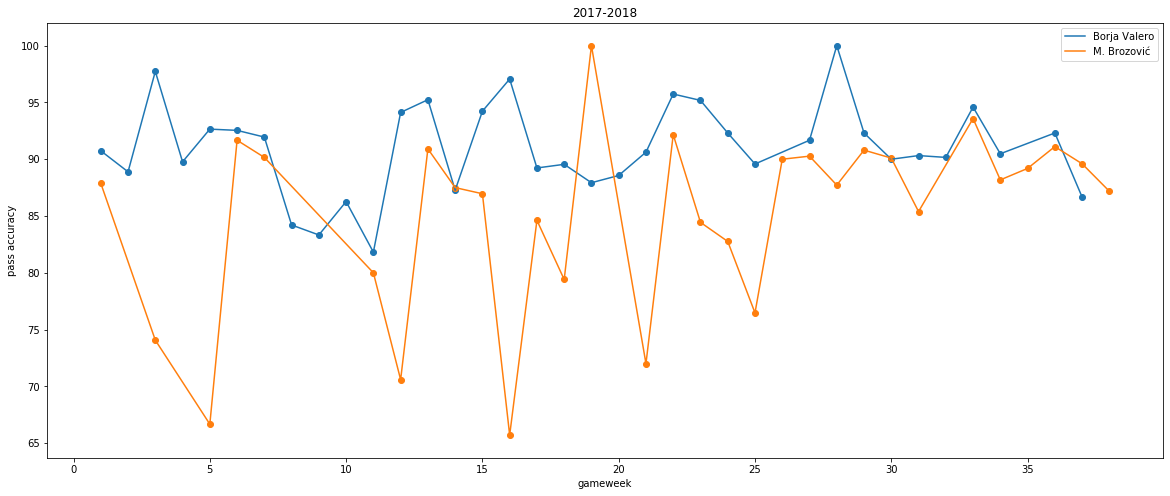

In [16]:
plt.figure(figsize=(20, 8))
players_to_compare = ["M. Brozović", "Borja Valero",]
group = positive_passes.query("shortName_x in " + str(players_to_compare))
for p in group.shortName_x.unique():
    df = group[group.shortName_x == p].sort_values(by="gameweek_x", ascending=True)
    df = df.reset_index(drop=True)
    plt.plot(df.gameweek_x, df["pass_accuracy"])
    plt.scatter(df.gameweek_x, df["pass_accuracy"])
plt.title("2017-2018")
plt.xlabel("gameweek")
plt.ylabel("pass accuracy")
plt.legend(group.shortName_x.unique())
plt.show()

**CALCULATE FORWARD PASS PERCENTAGE FOR EACH PLAYER IN EACH MATCH**

In [23]:
##filter by pass event (eventId == 8) and team associated to the event (teamId == 3161, which is inter_id)
forward_passes = inter_matches_events.query("eventId == 8 and teamId == 3161")
#assign a label forward="yes" for each forward pass (x_end > x_start)
forward = []
for i in range(len(forward_passes)):
    pass_ = forward_passes.iloc[i]
    if pass_.x_end > pass_.x_start:
        forward.append("yes")
    else:
        forward.append("no")
forward_passes = forward_passes.reset_index(drop=True)
forward_passes['forward'] = pd.Series(forward)
forward_passes.head(3)

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,subEventId,subEventName,teamId,x_start,y_start,x_end,y_end,tags,forward
0,8,Pass,9.514033,180458787,2575963,1H,20517,83.0,High pass,3161,13,6,41.0,15.0,[1801],yes
1,8,Pass,20.302244,180458791,2575963,1H,116349,85.0,Simple pass,3161,38,57,42.0,77.0,"[1401, 1801]",yes
2,8,Pass,22.047245,180458792,2575963,1H,20556,85.0,Simple pass,3161,42,77,30.0,94.0,[1801],no


In [24]:
#get columns referred to match (matchId), player (playerId) and label of the eventual forward pass
forward_passes = forward_passes[["matchId", "playerId", "forward"]]
forward_passes.head(3)

,matchId,playerId,forward
0,2575963,20517,yes
1,2575963,116349,yes
2,2575963,20556,no


In [25]:
#filter to keep only forward pass
forward_passes = forward_passes.query("forward == 'yes'")
#group accurated pass by match and player to obtain the count of forward pass for each player in each match
forward_passes = pd.DataFrame(forward_passes.groupby(['playerId', 'matchId', 'forward']).size()).reset_index()
forward_passes.drop("forward", axis=1, inplace=True)
forward_passes.columns = ["playerId", "matchId", "#forward_passes"]
forward_passes.head(3)

,playerId,matchId,#forward_passes
0,3344,2576180,12
1,3344,2576191,14
2,3344,2576203,28


In [26]:
#merge with players' data to obtain players' name and players' role
forward_passes = pd.merge(forward_passes, inter_players, how="left", left_on="playerId", right_on="wyId")[["playerId", "role_name", "shortName", "matchId", "#forward_passes"]]
forward_passes.head(3)

,playerId,role_name,shortName,matchId,#forward_passes
0,3344,Midfielder,Rafinha,2576180,12
1,3344,Midfielder,Rafinha,2576191,14
2,3344,Midfielder,Rafinha,2576203,28


In [27]:
#merge with matches' data to obtain matches' gameweek and matches' label
forward_passes = pd.merge(forward_passes, inter_matches, how="left", left_on="matchId", right_on="wyId")[["playerId", "role_name", "shortName", "matchId", "gameweek", "label", "#forward_passes"]]
forward_passes.head(3)

,playerId,role_name,shortName,matchId,gameweek,label,#forward_passes
0,3344,Midfielder,Rafinha,2576180,23,"Internazionale - Crotone, 1 - 1",12
1,3344,Midfielder,Rafinha,2576191,24,"Internazionale - Bologna, 2 - 1",14
2,3344,Midfielder,Rafinha,2576203,25,"Genoa - Internazionale, 2 - 0",28


In [28]:
#merge with count of total passes data 
forward_passes = pd.merge(forward_passes, positive_passes, how="left", left_on=["matchId", "playerId"], right_on=["matchId", "playerId"])[["playerId", "role_name_x", "shortName_x", "matchId", "gameweek_x", "label_x", "#forward_passes", "#passes"]]
forward_passes.head(3)

,playerId,role_name_x,shortName_x,matchId,gameweek_x,label_x,#forward_passes,#passes
0,3344,Midfielder,Rafinha,2576180,23,"Internazionale - Crotone, 1 - 1",12,27
1,3344,Midfielder,Rafinha,2576191,24,"Internazionale - Bologna, 2 - 1",14,26
2,3344,Midfielder,Rafinha,2576203,25,"Genoa - Internazionale, 2 - 0",28,41


In [29]:
#calculate forward pass percentage dividing count of forward passes by count of total passes
forward_passes['forward_percentage'] = round((forward_passes["#forward_passes"] / forward_passes["#passes"]) * 100, 2)
forward_passes.head(3)

,playerId,role_name_x,shortName_x,matchId,gameweek_x,label_x,#forward_passes,#passes,forward_percentage
0,3344,Midfielder,Rafinha,2576180,23,"Internazionale - Crotone, 1 - 1",12,27,44.44
1,3344,Midfielder,Rafinha,2576191,24,"Internazionale - Bologna, 2 - 1",14,26,53.85
2,3344,Midfielder,Rafinha,2576203,25,"Genoa - Internazionale, 2 - 0",28,41,68.29


**FOCUS ON BROZOVIC PASS PERFORMANCE**

In [30]:
match_id = inter_matches[inter_matches.label.str.contains(" - Napoli")].wyId.iloc[0]
forward_passes.query("playerId == " + str(brozovic.wyId.iloc[0]) + " and matchId == " + str(match_id))

,playerId,role_name_x,shortName_x,matchId,gameweek_x,label_x,#forward_passes,#passes,forward_percentage
306,69968,Midfielder,M. Brozović,2576234,28,"Internazionale - Napoli, 0 - 0",30,57,52.63


In [36]:
inter_players

,wyId,role_name,shortName
12,20519,Defender,A. Ranocchia
18,21094,Defender,D. D'Ambrosio
6,7982,Defender,D. Santon
0,298212,Defender,Dalbert
23,135903,Defender,João Cancelo
16,3431,Defender,João Miranda
19,86785,Defender,L. López
5,138408,Defender,M. Škriniar
2,69409,Defender,Š. Vrsaljko
22,256480,Forward,B. Keita


**BROZOVIC FORWARD PASS PERCENTAGE EVOLUTION DURING THE SEASON (COMPARED WITH BORJA VALERO)**

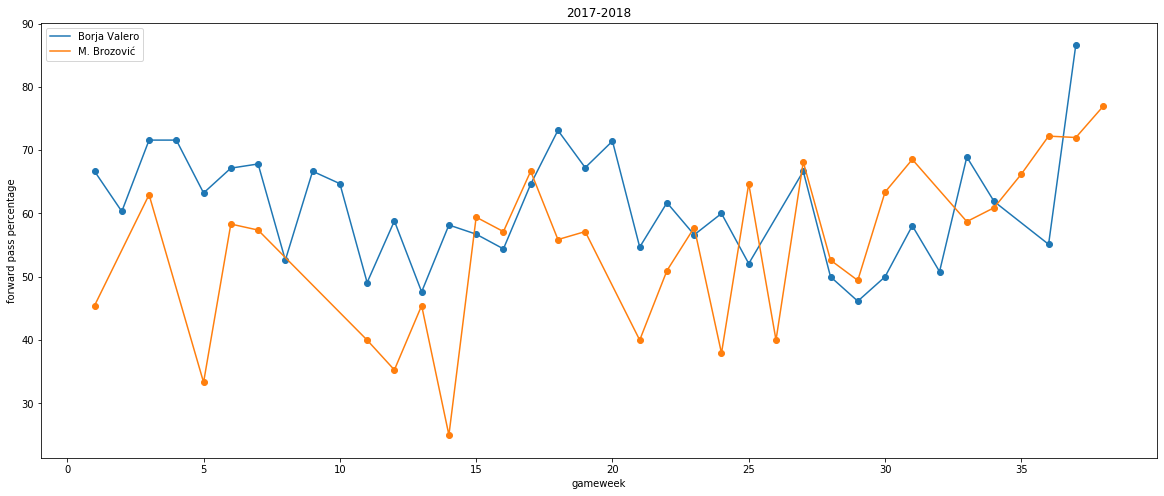

In [52]:
plt.figure(figsize=(20, 8))
players_to_compare = ["M. Brozović", "Borja Valero",]
group = forward_passes.query("shortName_x in " + str(players_to_compare))
for p in group.shortName_x.unique():
    df = group[group.shortName_x == p].sort_values(by="gameweek_x", ascending=True)
    df = df.reset_index(drop=True)
    plt.plot(df.gameweek_x, df["forward_percentage"])
    plt.scatter(df.gameweek_x, df["forward_percentage"])
plt.title("2017-2018")
plt.xlabel("gameweek")
plt.ylabel("forward pass percentage")
plt.legend(group.shortName_x.unique())
plt.show()

**RANK PLAYERS BY TOTAL NUMBER OF PASS IN THE SEASON**

In [73]:
rank = total_passes.groupby(["playerId", "shortName"]).sum()["#passes"]
rank.sort_values(ascending=False)

playerId  shortName     
138408    M. Škriniar       2273
3543      Borja Valero      1967
21094     D. D'Ambrosio     1744
69968     M. Brozović       1640
3431      João Miranda      1582
116349    M. Vecino         1537
14812     I. Perišić        1512
20556     A. Candreva       1455
241676    R. Gagliardini    1349
135903    João Cancelo      1346
3344      Rafinha            724
20571     S. Handanovič      702
7982      D. Santon          464
206314    M. Icardi          419
70965     João Mário         341
20519     A. Ranocchia       305
298212    Dalbert            295
20626     Eder               233
352993    Y. Karamoh         231
86785     L. López            25
Name: #passes, dtype: int64

**RANK PLAYERS BY PASS ACCURACY IN THE SEASON**

In [74]:
rank = positive_passes.groupby(["playerId", "shortName_x"]).sum()[["#positive_passes", "#passes"]]
rank["pass_accuracy"] = round((rank["#positive_passes"] / rank["#passes"]) * 100, 2)
rank.sort_values(by="pass_accuracy", ascending=False)

,,#positive_passes,#passes,pass_accuracy
playerId,shortName_x,,,
86785,L. López,25.0,25,100.00
20571,S. Handanovič,650.0,702,92.59
138408,M. Škriniar,2102.0,2273,92.48
3543,Borja Valero,1801.0,1967,91.56
3431,João Miranda,1430.0,1582,90.39
20519,A. Ranocchia,274.0,305,89.84
3344,Rafinha,649.0,724,89.64
116349,M. Vecino,1368.0,1537,89.00
70965,João Mário,299.0,341,87.68


**RANK PLAYERS BY FORWARD PASS PERCENTAGE IN THE SEASON**

In [75]:
rank = forward_passes.groupby(["playerId", "shortName_x"]).sum()[["#forward_passes", "#passes"]]
rank["forward_pass_percentage"] = round((rank["#forward_passes"] / rank["#passes"]) * 100, 2)
rank.sort_values(by="forward_pass_percentage", ascending=False)

,,#forward_passes,#passes,forward_pass_percentage
playerId,shortName_x,,,
20571,S. Handanovič,691,702,98.43
20519,A. Ranocchia,259,305,84.92
3431,João Miranda,1281,1582,80.97
138408,M. Škriniar,1721,2273,75.71
86785,L. López,18,25,72.00
21094,D. D'Ambrosio,1179,1744,67.60
135903,João Cancelo,853,1343,63.51
116349,M. Vecino,955,1537,62.13
3543,Borja Valero,1209,1967,61.46
